<a href="https://colab.research.google.com/github/sumyuck/ML-learning/blob/main/cvdl/CVDL_p_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

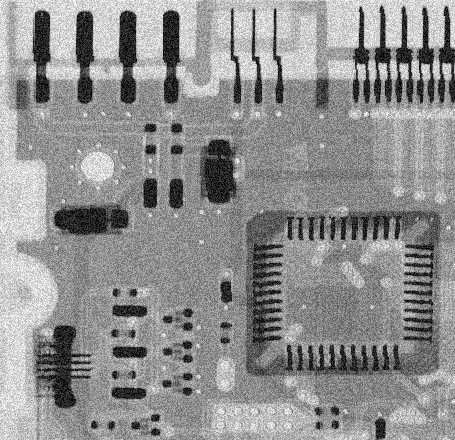

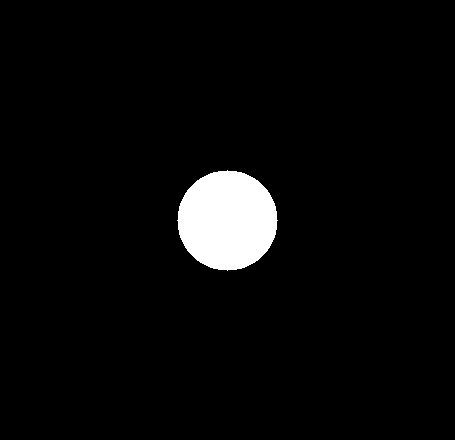

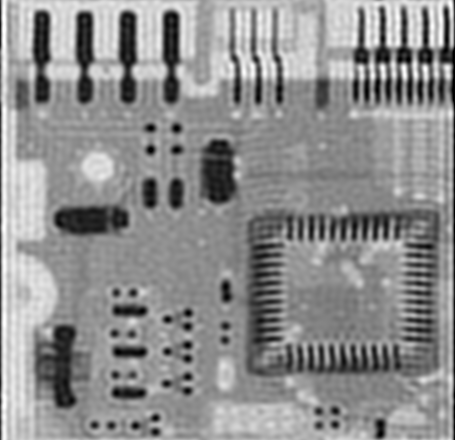

In [ ]:
# Fourier Transform of Image using Ideal Low Pass Filter

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = 'fig5.12(a).jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

m, n = img.shape

centered_img = img.astype(np.float32) * ((-1) ** (np.arange(m)[:, None] + np.arange(n)))

F = np.fft.fft2(centered_img)

cutoff = 50
u0, v0 = m // 2, n // 2
mask = np.zeros((m, n), dtype=float)

for u in range(m):
    for v in range(n):
        D = np.sqrt((u - u0) ** 2 + (v - v0) ** 2)
        if D <= cutoff:
            mask[u, v] = 1

F_filtered = F * mask

fourier_plot = (100.0 * np.log1p(np.abs(F_filtered))).astype(np.float32)
fourier_plot = fourier_plot.astype(np.float32)

f_back = np.fft.ifft2(F_filtered)
f_back = np.real(f_back)

final_img = f_back * ((-1) ** (np.arange(m)[:, None] + np.arange(n)))

cv2_imshow(img)
cv2_imshow(fourier_plot)
cv2_imshow(final_img)

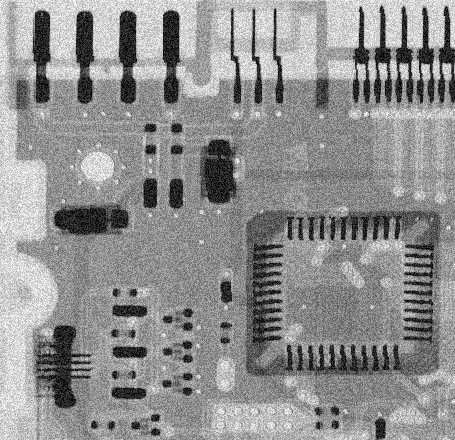

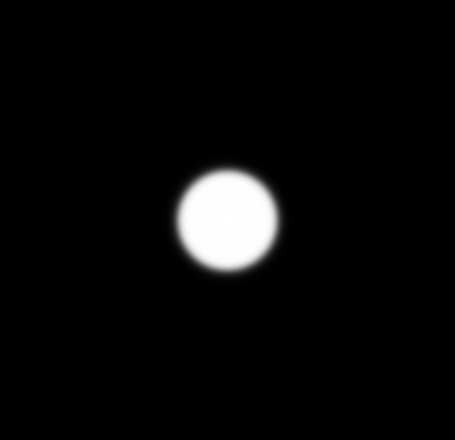

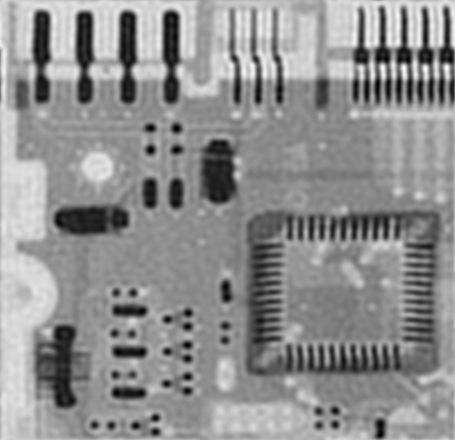

In [ ]:
# Fourier Transform of Image using Butterworth Low Pass Filter

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = 'fig5.12(a).jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
m, n = img.shape

F = np.fft.fft2(img.astype(np.float32))
F_shift = np.fft.fftshift(F)

D0 = 50
R  = 10
Y, X = np.ogrid[:m, :n]
cy, cx = m // 2, n // 2
D = np.sqrt((Y - cy)**2 + (X - cx)**2)
H = 1.0 / (1.0 + (D / (D0 + 1e-12))**(2 * R))

F_filt_shift = F_shift * H
F_filt = np.fft.ifftshift(F_filt_shift)
img_back = np.fft.ifft2(F_filt)
img_back = np.real(img_back)

mag_full  = np.log1p(np.abs(F_shift))
mag_filt  = np.log1p(np.abs(F_filt_shift))

cv2_imshow(img)
cv2_imshow((H * 255))
cv2_imshow(img_back)

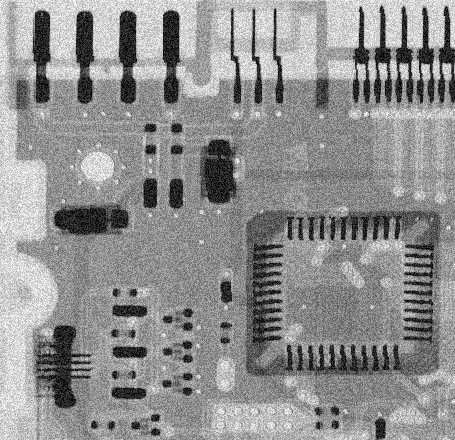

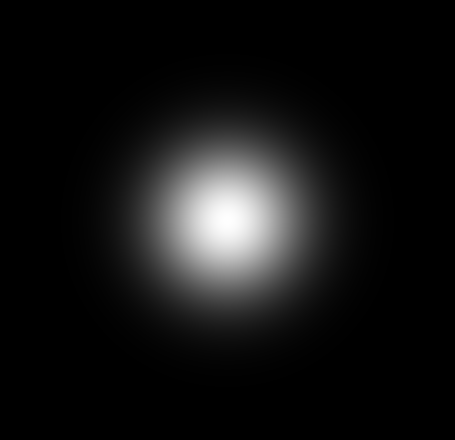

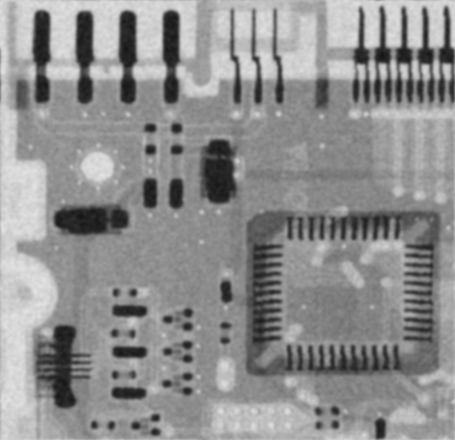

In [ ]:
# Fourier Transform of Image using Butterworth Low Pass Filter

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = 'fig5.12(a).jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
m, n = img.shape

F = np.fft.fft2(img.astype(np.float32))
F_shift = np.fft.fftshift(F)

D0 = 50.0
Y, X = np.ogrid[:m, :n]
cy, cx = m // 2, n // 2
D2 = (Y - cy)**2 + (X - cx)**2
H = np.exp(-D2 / (2.0 * (D0**2) + 1e-12))

F_filt_shift = F_shift * H
F_filt = np.fft.ifftshift(F_filt_shift)
img_back = np.real(np.fft.ifft2(F_filt))

mag_full = np.log1p(np.abs(F_shift))
mag_filt = np.log1p(np.abs(F_filt_shift))

cv2_imshow(img)
cv2_imshow((H * 255))
cv2_imshow(img_back)

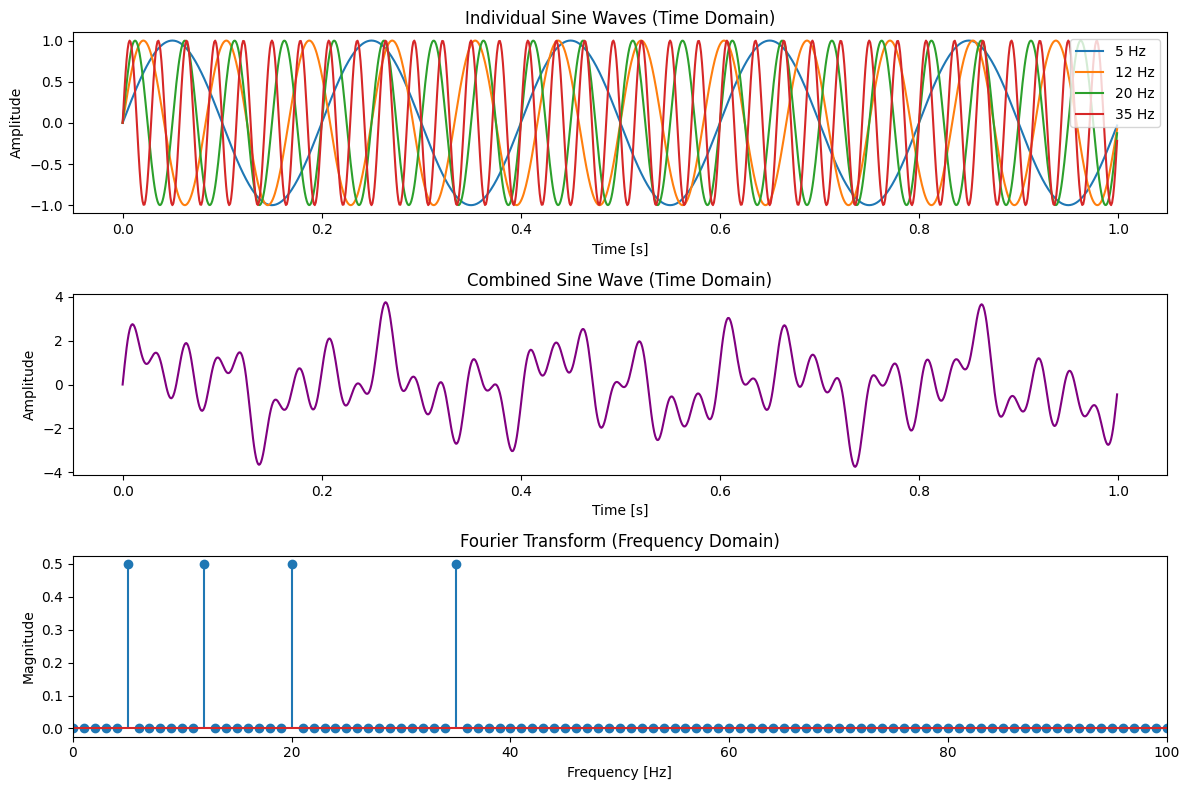

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000
T = 1
t = np.linspace(0, T, int(fs*T), endpoint=False)

f1, f2, f3, f4 = 5, 12, 20, 35
y1 = np.sin(2 * np.pi * f1 * t)
y2 = np.sin(2 * np.pi * f2 * t)
y3 = np.sin(2 * np.pi * f3 * t)
y4 = np.sin(2 * np.pi * f4 * t)
y_total = y1 + y2 + y3 + y4

Y = np.fft.fft(y_total)
freqs = np.fft.fftfreq(len(t), 1/fs)

half = len(freqs)//2
freqs_half = freqs[:half]
Y_half = np.abs(Y[:half]) / len(t)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, y1, label=f"{f1} Hz")
plt.plot(t, y2, label=f"{f2} Hz")
plt.plot(t, y3, label=f"{f3} Hz")
plt.plot(t, y4, label=f"{f4} Hz")
plt.title("Individual Sine Waves (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, y_total, color="purple")
plt.title("Combined Sine Wave (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.stem(freqs_half, Y_half)
plt.title("Fourier Transform (Frequency Domain)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.xlim(0, 100)

plt.tight_layout()
plt.show()

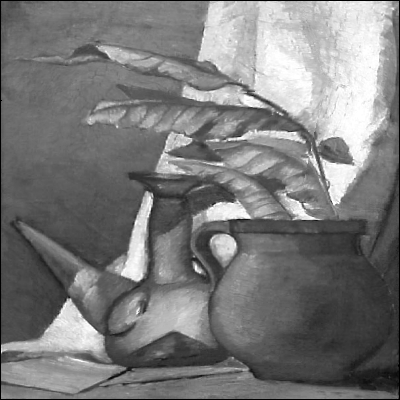

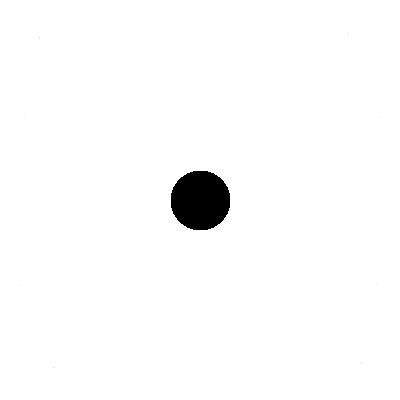

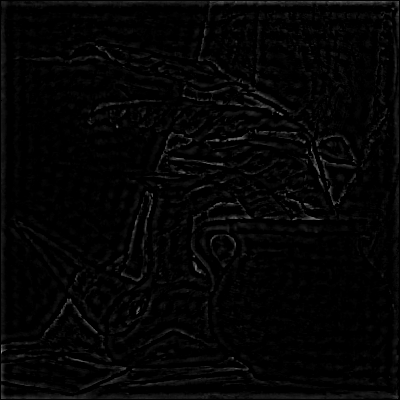

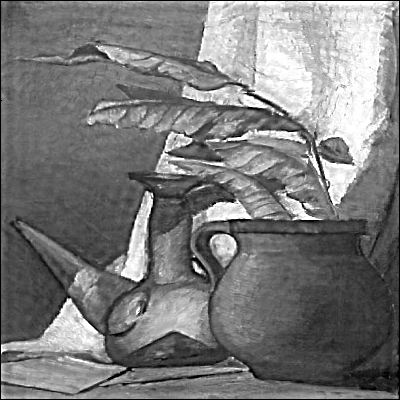

In [ ]:
# Fourier Transform of Image using Ideal High Pass Filter

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = 'fig5.35(b).jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

m, n = img.shape

centered_img = img.astype(np.float32) * ((-1) ** (np.arange(m)[:, None] + np.arange(n)))

F = np.fft.fft2(centered_img)

cutoff = 30
u0, v0 = m // 2, n // 2
mask = np.zeros((m, n), dtype=float)

for u in range(m):
    for v in range(n):
        D = np.sqrt((u - u0) ** 2 + (v - v0) ** 2)
        if D >= cutoff:
            mask[u, v] = 1

F_filtered = F * mask

fourier_plot = (100.0 * np.log1p(np.abs(F_filtered))).astype(np.float32)
fourier_plot = fourier_plot.astype(np.float32)

f_back = np.fft.ifft2(F_filtered)
f_back = np.real(f_back)

final_img = f_back * ((-1) ** (np.arange(m)[:, None] + np.arange(n)))

cv2_imshow(img)
cv2_imshow(fourier_plot)
cv2_imshow(final_img)
cv2_imshow(img + final_img)

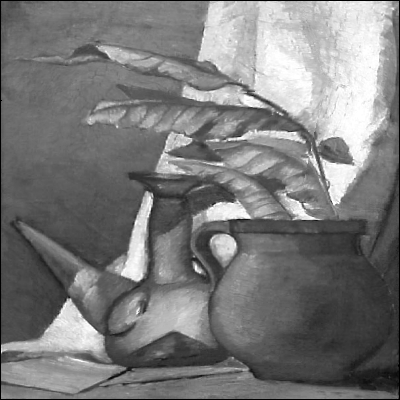

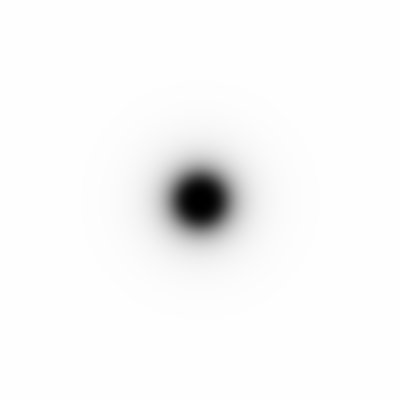

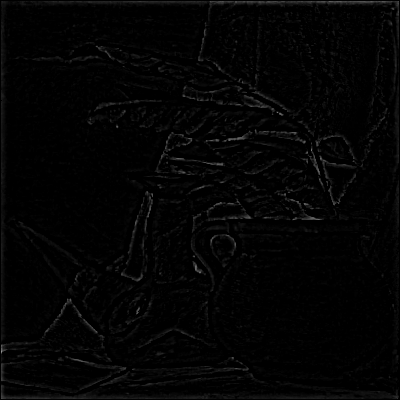

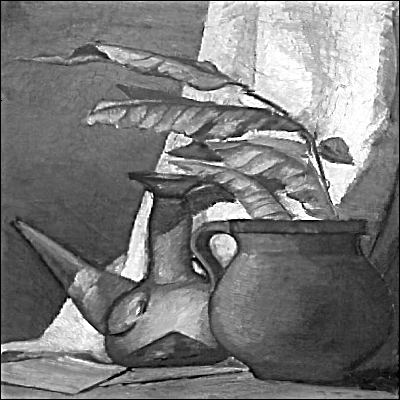

In [ ]:
# Fourier Transform of Image using ButterWorth High Pass Filter

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = 'fig5.35(b).jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
m, n = img.shape

F = np.fft.fft2(img.astype(np.float32))
F_shift = np.fft.fftshift(F)

D0 = 30
R  = 2
Y, X = np.ogrid[:m, :n]
cy, cx = m // 2, n // 2
D = np.sqrt((Y - cy)**2 + (X - cx)**2)
H = 1.0 / (1.0 + (D0 / (D + 1e-12))**(2 * R))

F_filt_shift = F_shift * H
F_filt = np.fft.ifftshift(F_filt_shift)
img_back = np.real(np.fft.ifft2(F_filt))

cv2_imshow(img)
cv2_imshow((H * 255))
cv2_imshow(img_back)
cv2_imshow(img + img_back)

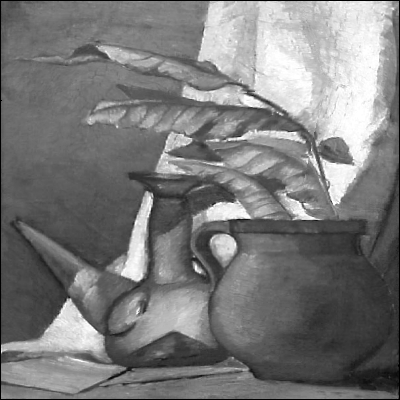

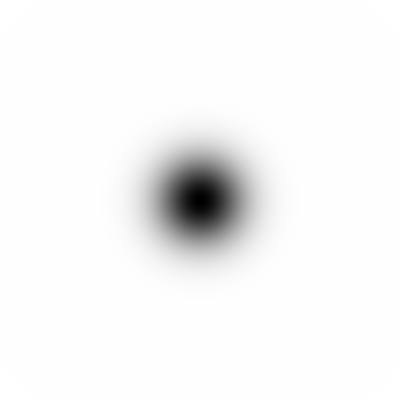

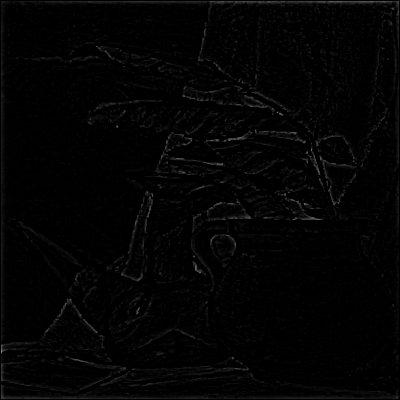

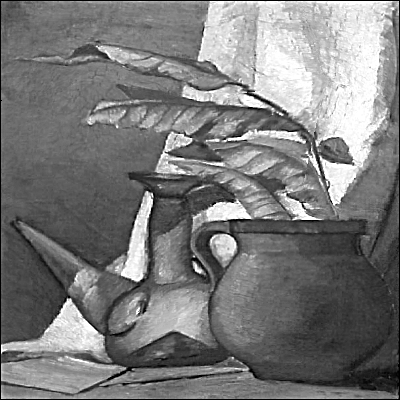

In [ ]:
# Fourier Transform of Image using Gaussian High Pass Filter

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = 'fig5.35(b).jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
m, n = img.shape

F = np.fft.fft2(img.astype(np.float32))
F_shift = np.fft.fftshift(F)

D0 = 30.0
Y, X = np.ogrid[:m, :n]
cy, cx = m // 2, n // 2
D2 = (Y - cy)**2 + (X - cx)**2
H = 1.0 - np.exp(-D2 / (2.0 * (D0**2) + 1e-12))

F_filt_shift = F_shift * H
F_filt = np.fft.ifftshift(F_filt_shift)
img_back = np.real(np.fft.ifft2(F_filt))

cv2_imshow(img)
cv2_imshow((H * 255))
cv2_imshow(img_back)
cv2_imshow(img + img_back)

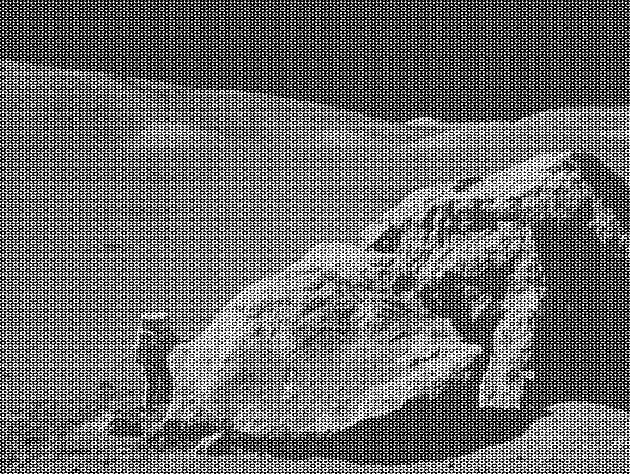

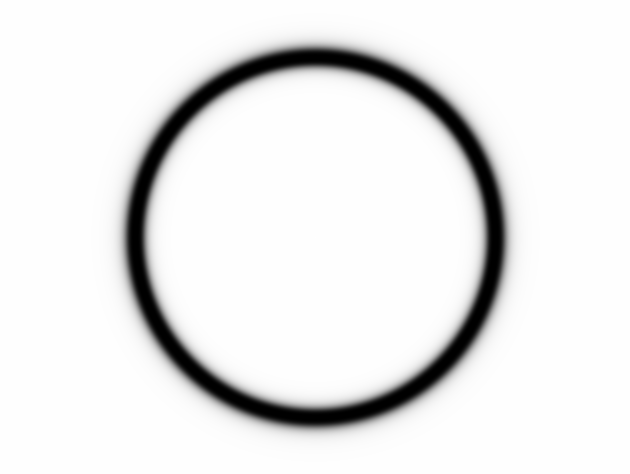

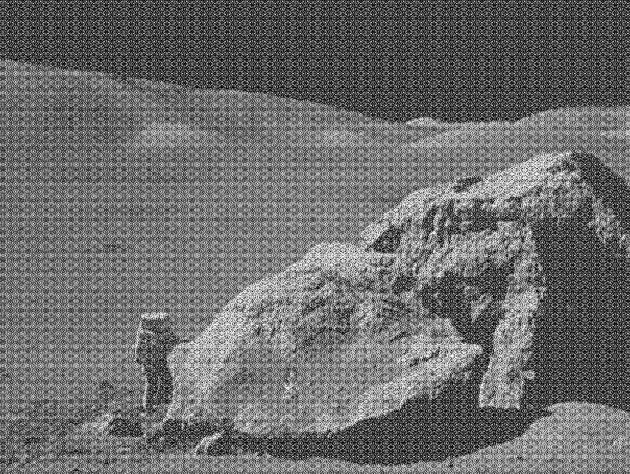

In [ ]:
# Band Reject Filter

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = 'Fig0505(a)(applo17_boulder_noisy).tif'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
m, n = img.shape

F = np.fft.fft2(img.astype(np.float32))
F_shift = np.fft.fftshift(F)

D0 = 180.0
W  = 20.0
R  = 2
Y, X = np.ogrid[:m, :n]
cy, cx = m // 2, n // 2
D2 = (Y - cy)**2 + (X - cx)**2
D = np.sqrt(D2)
eps = 1e-12
H = 1.0 / (1.0 + ((D * W) / (np.abs(D2 - D0**2) + eps))**(2 * R))

F_filt_shift = F_shift * H
F_filt = np.fft.ifftshift(F_filt_shift)
img_back = np.real(np.fft.ifft2(F_filt))

cv2_imshow(img)
cv2_imshow(H * 255)
cv2_imshow(img_back)

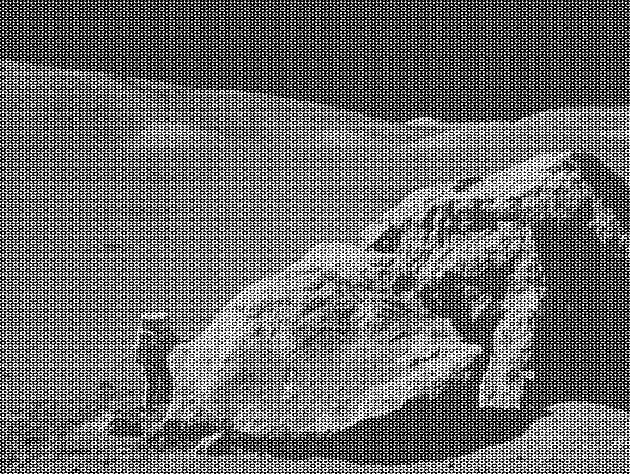

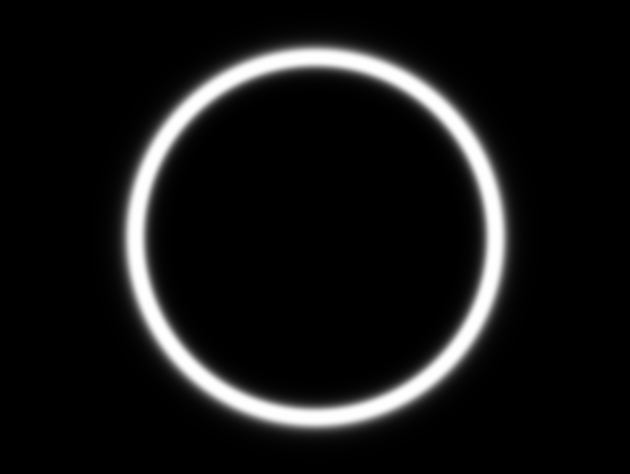

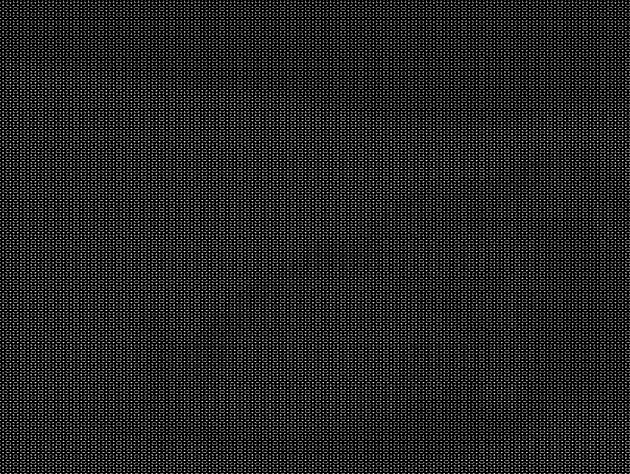

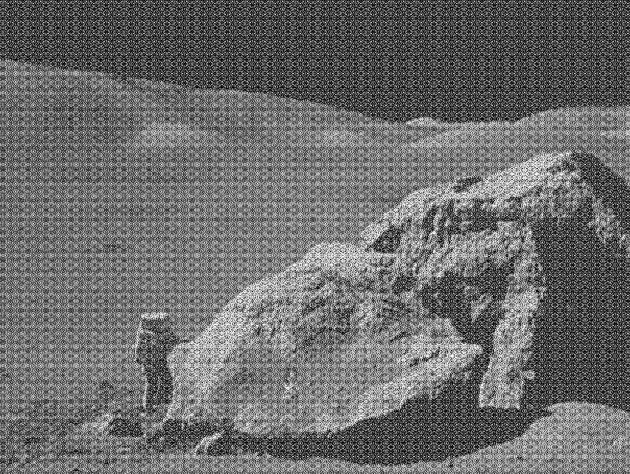

In [ ]:
# Band Pass Filter

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = 'Fig0505(a)(applo17_boulder_noisy).tif'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
m, n = img.shape

F = np.fft.fft2(img.astype(np.float32))
F_shift = np.fft.fftshift(F)

D0 = 180.0
W  = 20.0
R  = 2
Y, X = np.ogrid[:m, :n]
cy, cx = m // 2, n // 2
D = np.sqrt((Y - cy)**2 + (X - cx)**2) + 1e-12
H_br = 1.0 / (1.0 + ((D * W) / (D**2 - D0**2 + 1e-12))**(2 * R))
H = 1.0 - H_br

F_filt_shift = F_shift * H
F_filt = np.fft.ifftshift(F_filt_shift)
img_back = np.real(np.fft.ifft2(F_filt))

cv2_imshow(img)
cv2_imshow((H * 255))
cv2_imshow(img_back)
cv2_imshow(img - img_back)